# Netwoks in different connectivty (g):
This notebook will set networks side by side which are different in the connectivity constant "g".
This procedure will be done with the help of engine code in __network_simulation.py__ file. It contains network object and serves its behaviours.

In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas() #This line make sure that the progress bars looks natural.

In [3]:
from network_simulation import Rotational_neural_network

In [4]:
connectivity_span = np.arange(0.1,5,0.25)
num_ensembles_each_g = 5
sync_param_record = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g) )
sigma_record = np.zeros( shape = (len(connectivity_span),num_ensembles_each_g) )

## Creating various ensembles:

In [5]:
num_neurons = 1000
total_time = 1000

In [6]:
for i,connectivity in enumerate(tqdm( connectivity_span , desc='Variation of connectivities') ):
    for j in tqdm( range(num_ensembles_each_g) , desc='Making ensembles'):
        sample_model = Rotational_neural_network(num_neurons=num_neurons,g=connectivity)
        sample_model.ignite(total_time = total_time)
        # sample_model.compute_effective_field( alpha = 20)
        sync_param_record[i][j] = sample_model.report_sync_parameter()
        sigma_record[i][j] = sample_model.report_sigma()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14743.25it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 19791.30it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 15115.41it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:04<00:00, 21181.32it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 17483.13it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 18476.35it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 19126.86it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 18728.24it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 17171.28it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 17958.42it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:07<00:00, 13500.27it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:07<00:00, 13799.43it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:07<00:00, 14262.66it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14594.78it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14749.41it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14669.57it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14825.74it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14806.03it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14723.43it/s]

network dynamic: 100%|████████████████████████████████████████████████████████| 99999/99999 [00:06<00:00, 14738.58it/s]

In [7]:
# sigma_record = connectivity_record
np.save('sync_param_records_{}.npy'.format(num_neurons),sync_param_record)
np.save('sigma_records_{}.npy'.format(num_neurons),sigma_record)

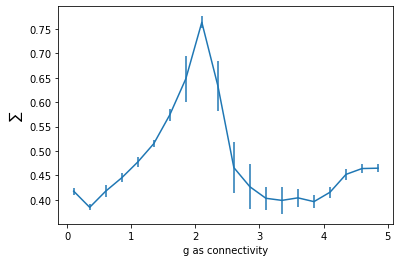

In [8]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = connectivity_span, y = np.mean(sync_param_record,axis = 1),yerr = np.var(sync_param_record,axis = 1)**(0.5))
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sum \frac{sin\theta_i}{N}$')
fig.savefig('synchoronization_{}_{}_{}.png'.format(num_neurons,connectivity_span[0],connectivity_span[-1]))

In [9]:
np.sum(sync_param_record,axis = 0)

array([9.60935472, 9.36637431, 9.33672981, 9.82683099, 9.69390453])

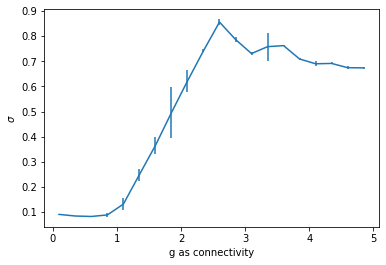

In [10]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = connectivity_span, y = np.mean(sigma_record,axis = 1),yerr = np.var(sigma_record,axis = 1)**(0.5))
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig('sigma_as_synchoronization_meter_{}.png'.format(num_neurons))